# Problem Statement:

##### Using dataset to classify loan applicant's risk segmentation

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Part - 1 Data Exploration and Pre-Processing

#### 1 - Loading the Dataset

In [2]:
df = pd.read_excel(r"C:\Users\Vyas\1_Assignment\ML FT Projects\KNN\P7_Loan_Applicant_Risk_Classification\Python_Project_7_KNN.xlsx")
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


#### 2 - Checking the Null Values in the dataset

In [3]:
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

#### 3 - Checking the basic data of the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [5]:
print("No. of Rows are: ", df.shape[0])
print("No. of Columns are: ", df.shape[1])

No. of Rows are:  8995
No. of Columns are:  7


In [6]:
df.columns = df.columns.str.replace(' ','_')

In [7]:
df.columns

Index(['Age', 'Total_Work_Experience', 'Number_of_years_in_city',
       'Cost_to_Request_Ratio', 'Cibil_score', 'Overdrafts_past12months',
       'Total_bounces_past12months'],
      dtype='object')

#### 4 - Describing the Dataset

In [8]:
df.describe()

,Age,Total_Work_Experience,Number_of_years_in_city,Cost_to_Request_Ratio,Cibil_score,Overdrafts_past12months,Total_bounces_past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


#### 5 - Scatterplot of age vs total work experience

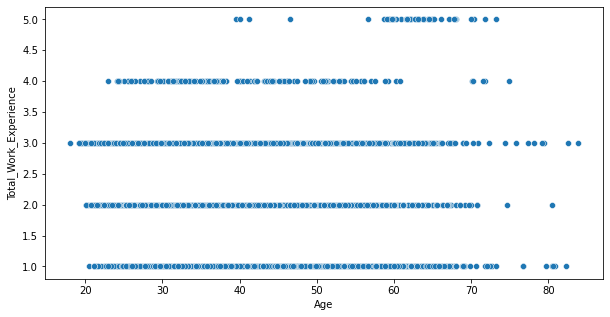

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Age',y='Total_Work_Experience',data=df);

#### 6 - Displaying Boxplot for age

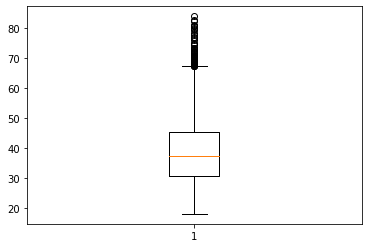

In [10]:
plt.boxplot(df.Age)
plt.show()

#### 7 - Displaying Boxplot for Cibil Score

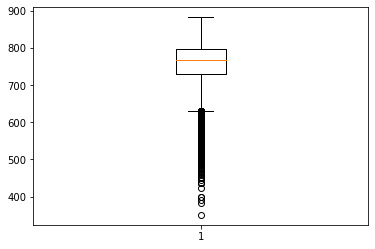

In [11]:
plt.boxplot(df.Cibil_score)
plt.show()

#### 8 - Creating Target and Feature Data

In [12]:
X = df.drop('Total_bounces_past12months',axis=1)
y = df[['Total_bounces_past12months']]

## Part - 2 Working with Model

#### 1 - Spliting the data into training and testing sets

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

#### 2 - Creating KNN Classifier between features and target data

In [14]:
model = KNeighborsClassifier()

In [15]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [16]:
pred = model.predict(X_test)

#### 3 - Displaying the test score

In [17]:
model.score(X_test,y_test)

0.6386881600889383

#### 4 - Displaying the training score

In [18]:
model.score(X_train,y_train)

0.6771817676486938

#### 5 - Displaying the accuracy score

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test,pred)

0.6386881600889383

#### 6 - Trying the 1 to 14 KValues for classifier

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
test_score = []
train_score = []
for i in range (1,15):
    model = KNeighborsClassifier(i)
    model.fit(X_train,y_train)
    
    test_score.append(model.score(X_test,y_test))
    train_score.append(model.score(X_train,y_train))

#### 7 - Displaying training and testing score for all the 1 to 14 KValues

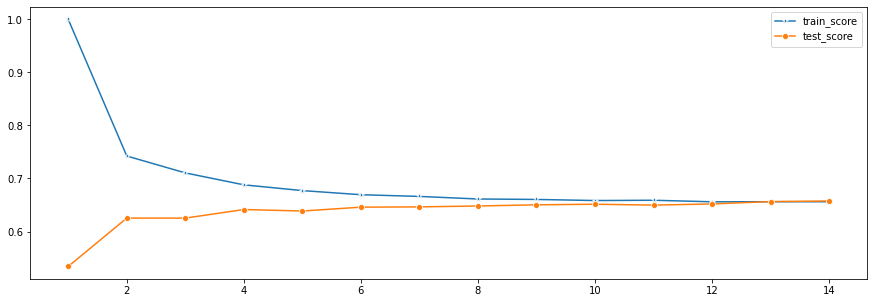

In [23]:
plt.figure(figsize=(15,5))
q = sns.lineplot(range(1,15),train_score,marker='*',label='train_score')
q = sns.lineplot(range(1,15),test_score,marker='o',label='test_score')